In [97]:
import sklearn.datasets as sk_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [98]:
# data = sk_data.load_diabetes()
data = sk_data.load_iris()

In [99]:
type(data)

sklearn.utils.Bunch

In [100]:
df = pd.DataFrame(data=np.c_[data['data'], np.c_[data['target']]], columns= data['feature_names'] + ['target'])

In [101]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [102]:
df = df.drop(df[df.target == 2].index)

colours = [ [ 'r', 'b' ][int(x)] for x in np.nditer(df['target'])] 


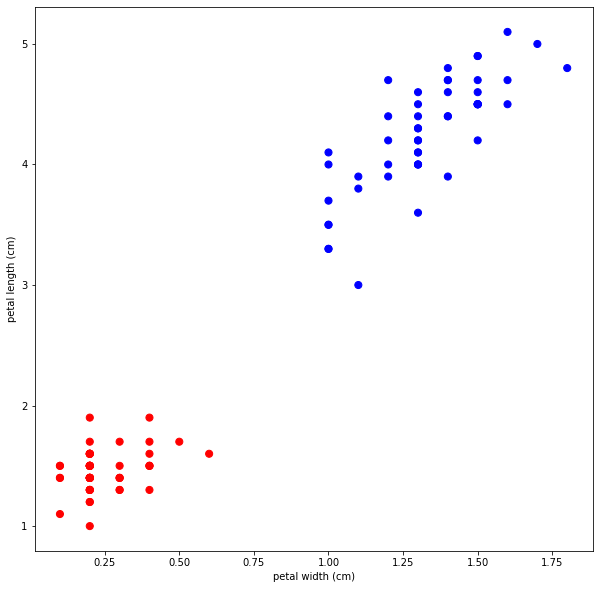

In [103]:
plt.figure(figsize=(10,10))
plt.scatter(df['petal width (cm)'],df['petal length (cm)'],50, colours)
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
# plt.legend(['Setosa', 'Versicolor'])
plt.show()


In [104]:
data = sk_data.load_diabetes()

df = pd.DataFrame(data=np.c_[data['data'], np.c_[data['target']]], columns= data['feature_names'] + ['target'])


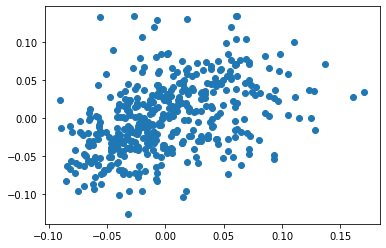

In [105]:
# df.corr()
plt.scatter(df['bmi'], df['s5'])

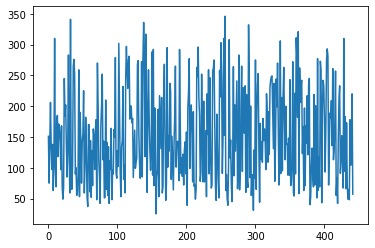

In [106]:
plt.plot(df['target'])